In [58]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import random

In [59]:
# Solicitar o ano de referência ao usuário
year_reference = 2023

# Lista de tickers do IBRX 50
tickets_ibrx50 = [
    'ABEV3.SA', 'ALPA4.SA', 'AMAR3.SA', 'ARZZ3.SA', 'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA',
    'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA', 'BRAP4.SA',
    'BRFS3.SA', 'BRKM5.SA', 'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA', 'COGN3.SA',
    'CPFE3.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'ECOR3.SA', 'EGIE3.SA',
    'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENEV3.SA', 'ENGI11.SA', 'EQTL3.SA', 'EZTC3.SA',
    'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA', 'HYPE3.SA',
    'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'LREN3.SA', 'MGLU3.SA',
    'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA', 'NTCO3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PRIO3.SA',
    'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA', 'RENT3.SA', 'SBSP3.SA', 'SLCE3.SA', 'SUZB3.SA',
    'TAEE11.SA', 'TOTS3.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VIVT3.SA', 'WEGE3.SA',
    'YDUQ3.SA'
]

# Criar dataframes vazios para armazenar dados
df_close = pd.DataFrame()
df_dividends = pd.DataFrame()

# Baixar dados de fechamento e dividendos para cada ticker individualmente
for ticker in tickets_ibrx50:
    data = yf.Ticker(ticker)
    hist = data.history(period="5y")

    if 'Close' in hist.columns and 'Dividends' in hist.columns:
        # Filtrar apenas ações que pagaram dividendos nos últimos 5 anos
        if hist['Dividends'].sum() > 0:
            df_close[ticker] = hist['Close']
            df_dividends[ticker] = hist['Dividends']

# Filtrar dados do ano de referência
df_close_year = df_close[df_close.index.year == year_reference]
df_dividends_year = df_dividends[df_dividends.index.year == year_reference]

# Calcular o preço médio de fechamento anual e adicionar a coluna de ano de referência
avg_close_year = df_close_year.mean().to_frame(name='Average Close')
avg_close_year['Ano de Referência'] = year_reference

# Calcular o total de dividendos pagos no ano e adicionar a coluna de ano de referência
total_dividends_year = df_dividends_year.sum().to_frame(name='Total Dividends')
total_dividends_year['Ano de Referência'] = year_reference

# Calcular o dividend yield anual e adicionar a coluna de ano de referência
dividend_yield_year = (total_dividends_year['Total Dividends'] / avg_close_year['Average Close']).sort_values(ascending=False).to_frame(name='Dividend Yield')
dividend_yield_year['Ano de Referência'] = year_reference

# Ordenar todas as ações pelo maior dividend yield até o menor
ordered_dividend_yield = dividend_yield_year.sort_values(by='Dividend Yield', ascending=False)

# Armazenar o dataframe com os dados necessários
data = pd.DataFrame({
    'Ticker': ordered_dividend_yield.index,
    'Dividend Yield': ordered_dividend_yield['Dividend Yield'].values,
    'Ano de Referência': ordered_dividend_yield['Ano de Referência'].values
})

# Exibir o dataframe final
print(data)
print(avg_close_year)
print(total_dividends_year)


      Ticker  Dividend Yield  Ano de Referência
0   PETR4.SA        0.304028               2023
1   PETR3.SA        0.272294               2023
2   GOAU4.SA        0.150687               2023
3   BRAP4.SA        0.137358               2023
4   CMIG4.SA        0.125663               2023
..       ...             ...                ...
60  IRBR3.SA        0.000000               2023
61  MRFG3.SA        0.000000               2023
62  COGN3.SA        0.000000               2023
63  MGLU3.SA        0.000000               2023
64  MRVE3.SA        0.000000               2023

[65 rows x 3 columns]
          Average Close  Ano de Referência
ABEV3.SA      13.355544               2023
ALPA4.SA       9.516573               2023
ARZZ3.SA      69.777914               2023
ASAI3.SA      14.027680               2023
B3SA3.SA      12.304810               2023
...                 ...                ...
USIM5.SA       6.946318               2023
VALE3.SA      68.522865               2023
VIVT3.SA      

In [60]:
avg_close_year.tail(20)

,Average Close,Ano de Referência
NTCO3.SA,14.045014,2023
PCAR3.SA,12.742782,2023
PETR3.SA,26.971935,2023
PETR4.SA,24.156605,2023
PRIO3.SA,40.937752,2023
QUAL3.SA,4.111339,2023
RADL3.SA,25.976492,2023
RAIL3.SA,21.019107,2023
RENT3.SA,57.809851,2023
SBSP3.SA,55.104080,2023


In [61]:
total_dividends_year.tail(20)

,Total Dividends,Ano de Referência
NTCO3.SA,0.000000,2023
PCAR3.SA,0.000000,2023
PETR3.SA,7.344291,2023
PETR4.SA,7.344291,2023
PRIO3.SA,0.072644,2023
QUAL3.SA,0.079075,2023
RADL3.SA,0.304600,2023
RAIL3.SA,0.066017,2023
RENT3.SA,1.502569,2023
SBSP3.SA,1.276000,2023


In [62]:
data.head(20)

,Ticker,Dividend Yield,Ano de Referência
0,PETR4.SA,0.304028,2023
1,PETR3.SA,0.272294,2023
2,GOAU4.SA,0.150687,2023
3,BRAP4.SA,0.137358,2023
4,CMIG4.SA,0.125663,2023
5,CIEL3.SA,0.121789,2023
6,BBSE3.SA,0.115856,2023
7,BBDC3.SA,0.112025,2023
8,BBDC4.SA,0.108548,2023
9,CSNA3.SA,0.107607,2023


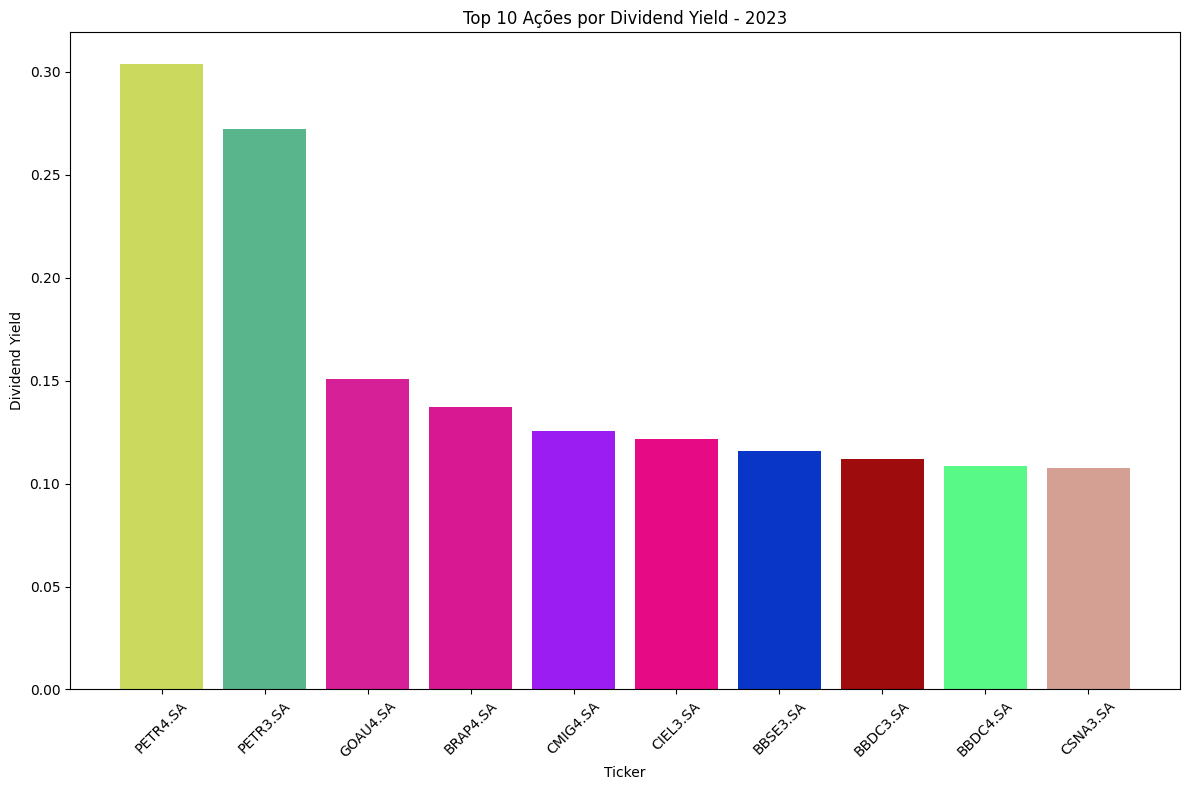

In [64]:
# Função para plotar o gráfico de barras com cores aleatórias
def plot_dividend_yields(data, num_acoes=10):
    """
    Plota os Dividend Yields das ações em um gráfico de barras.

    Parâmetros:
    - data: DataFrame contendo as colunas 'Ticker', 'Dividend Yield' e 'Ano de Referência'
    - num_acoes: Número de ações a serem plotadas (default é 10)
    """
    # Ordenar os dados pelo Dividend Yield
    data_sorted = data.sort_values(by='Dividend Yield', ascending=False).head(num_acoes)

    # Gerar cores aleatórias
    colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in range(num_acoes)]

    # Plotar o gráfico de barras
    plt.figure(figsize=(12, 8))
    plt.bar(data_sorted['Ticker'], data_sorted['Dividend Yield'], color=colors)
    plt.xlabel('Ticker')
    plt.ylabel('Dividend Yield')
    plt.title(f'Top {num_acoes} Ações por Dividend Yield - {data_sorted["Ano de Referência"].iloc[0]}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Exemplo de uso da função
plot_dividend_yields(data, num_acoes=10)